##### Before reading in data :

A bit of cleaning and tweeking was done with excel before reading the data into python:

On domains/subdomains of NCE, PR, and AE the following changes were made in excel: >99 to 99.1; >99.9 to 99.9; <1 to 0.1; <0.1 to 0.01; <0 to 0; <24 to 24 

On domains/subdomains of RDI the following changes were made: <1/90 to 1/90; >99/90 to 99/90
Also, errors to the RDI column in the form of dates were fixed to their intended fraction format

Additionally new columns were made: 
date tested column derived from one of the other test date columns which did have missing values, these were filled in with additional dates from other date columns (there should not be nulls)

one for age which shows years and months, or only days depending on the time difference between date of birth and date of testing

Three rows total associated with child IDs 523241 and 523644 were removed as there were no assemssments preformed accross all fields

##### Topic/Questions that need to be analyzed (MVP)

#4 Does the child's age seem to impact their scoring?

#6 Is there any difference in scoring noted based on evaluation type?

###### EDA and additional cleaning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
df = pd.read_excel('../data/myversion_cleaneval.xlsx')

In [3]:
df.head()

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,8 month(s),2022-09-27,2023-06-23,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,...,9.0,13.0,84.0,12.0,98/90,411.0,392 - 431,1,60.0,71.0
1,47795,F,2 year(s) 2 month(s),2020-12-23,2023-03-21,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,...,11.0,7.0,16.0,18.0,29/90,437.0,421 - 453,– 1.00,40.0,29.0
2,54340,M,1 year(s) 9 month(s),2021-06-22,2023-04-06,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25.0,...,10.0,7.0,16.0,15.0,37/90,426.0,408 - 444,– 1.00,40.0,29.0
3,54344,F,11 month(s),2022-03-07,2023-02-23,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,...,9.0,10.0,50.0,12.0,92/90,411.0,392 - 431,0,50.0,50.0
4,54515,M,1 year(s) 3 month(s),2021-11-04,2023-02-24,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5.0,...,10.0,10.0,50.0,15.0,88/90,426.0,408 - 444,0,50.0,50.0


In [4]:
df.shape

(23944, 211)

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23944 entries, 0 to 23943
Data columns (total 211 columns):
 #    Column                                                       Non-Null Count  Dtype         
---   ------                                                       --------------  -----         
 0    Child ID                                                     23944 non-null  object        
 1    Gender                                                       23944 non-null  object        
 2    Age                                                          23944 non-null  object        
 3    Date of Birth                                                23944 non-null  datetime64[ns]
 4    Date Tested                                                  23944 non-null  datetime64[ns]
 5    Location - Sub Level 1                                       23812 non-null  object        
 6    Program Label                                                23944 non-null  object        
 7    Ad

In [6]:
df.columns

Index(['Child ID', 'Gender', 'Age', 'Date of Birth', 'Date Tested',
       'Location - Sub Level 1', 'Program Label',
       'Adaptive Sum of Scaled Scores', 'Adaptive Developmental Quotient',
       'Adaptive Percentile Rank',
       ...
       'Cognitive-Perception and Concepts RS',
       'Cognitive-Perception and Concepts SS',
       'Cognitive-Perception and Concepts PR',
       'Cognitive-Perception and Concepts AE',
       'Cognitive-Perception and Concepts RDI',
       'Cognitive-Perception and Concepts CSS',
       'Cognitive-Perception and Concepts CSS 90%',
       'Cognitive-Perception and Concepts Z-Score',
       'Cognitive-Perception and Concepts T-Score',
       'Cognitive-Perception and Concepts NCE'],
      dtype='object', length=211)

In [7]:
df=df.drop_duplicates().reset_index()

In [8]:
#Code from James on different way to drop duplicates 
# df_raw[evals_raw['Child ID'].str.startswith('SP', na=False)]
# df_raw['is_duplicate'] = df_raw.duplicated(subset=['Child ID', 'Date of Testing'])
# df2 = df_raw[df_raw['is_duplicate']==False]
# df2 = df.drop('is_duplicate', axis=1)

In [9]:
df=df.drop(columns=['index'])

After droping duplicate rows 19,498 out of 23,944 entries still remain

In [10]:
df.isnull().sum().sort_values(ascending=False)

Adaptive-Personal Responsibility RDI      9818
Motor-Perceptual Motor RDI                9813
Social Emotional-Peer Interaction RDI     9812
Motor-Perceptual Motor Date of Testing    9810
Motor-Perceptual Motor SS                 9810
                                          ... 
Program Label                                0
Date Tested                                  0
Date of Birth                                0
Age                                          0
Child ID                                     0
Length: 211, dtype: int64

In [11]:
#code from elisia
df.isna().sum().reset_index(name='nulls').sort_values('nulls').head(50)


,index,nulls
0,Child ID,0
6,Program Label,0
4,Date Tested,0
55,Adaptive-Self Care Examiner,0
2,Age,0
3,Date of Birth,0
1,Gender,0
56,Adaptive-Self Care Date of Testing,4
66,Adaptive-Self Care NCE,4
65,Adaptive-Self Care T-Score,4


In [12]:
df['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [13]:
df[df['Gender']=='U']
# 294

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
149,486118,U,3 year(s) 1 month(s),2020-03-30,2023-05-24,East Tennessee,BDI-3 Annual Evaluation,21.0,103.0,58.0,...,21.0,10.0,50.0,38.0,91/90,502.0,494 - 511,0,50.0,50.0
193,487659,U,2 year(s) 11 month(s),2020-07-29,2023-07-06,East Tennessee,BDI-3 Annual Evaluation,23.0,109.0,73.0,...,21.0,11.0,63.0,38.0,96/90,502.0,494 - 511,0.33,53.0,57.0
213,488355,U,2 year(s) 11 month(s),2020-08-24,2023-08-23,East Tennessee,BDI-3 Annual Evaluation,18.0,94.0,34.0,...,23.0,12.0,75.0,40.0,98/90,507.0,500 - 515,0.67,57.0,64.0
221,488606,U,2 year(s) 10 month(s),2020-07-23,2023-06-20,Upper Cumberland,BDI-3 Annual Evaluation,11.0,73.0,4.0,...,9.0,2.0,0.1,12.0,1/90,411.0,392 - 431,– 2.67,23.0,0.1
233,489051,U,3 year(s),2020-08-01,2023-08-09,East Tennessee,BDI-3 Annual Evaluation,21.0,103.0,58.0,...,14.0,7.0,16.0,28.0,25/90,471.0,459 - 484,– 1.00,40.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19263,SP03057,U,2 year(s) 5 month(s),2021-04-09,2023-09-27,East Tennessee,BDI-3 Eligibility Evaluation,20.0,100.0,50.0,...,16.0,11.0,63.0,31.0,95/90,482.0,471 - 493,0.33,53.0,57.0
19276,SP03070,U,1 year(s) 9 month(s),2021-12-18,2023-09-29,East Tennessee,BDI-3 Eligibility Evaluation,6.0,80.0,9.0,...,10.0,7.0,16.0,15.0,37/90,426.0,408 - 444,– 1.00,40.0,29.0
19344,SP03138,U,4 month(s),2023-05-23,2023-10-16,First Tennessee,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,...,3.0,6.0,9.0,0.0,16/90,331.0,311 - 350,– 1.33,37.0,22.0
19357,SP03151,U,2 year(s) 3 month(s),2021-07-09,2023-10-19,East Tennessee,BDI-3 Eligibility Evaluation,8.0,64.0,1.0,...,12.0,7.0,16.0,22.0,39/90,451.0,429 - 473,– 1.00,40.0,29.0


In [14]:
df[df['Gender']=='M']
# 11958

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
2,54340,M,1 year(s) 9 month(s),2021-06-22,2023-04-06,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25.00,...,10.0,7.0,16.0,15.0,37/90,426.0,408 - 444,– 1.00,40.0,29.0
4,54515,M,1 year(s) 3 month(s),2021-11-04,2023-02-24,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5.00,...,10.0,10.0,50.0,15.0,88/90,426.0,408 - 444,0,50.0,50.0
5,54584,M,2 year(s) 8 month(s),2020-06-05,2023-02-13,Northwest,BDI-3 Eligibility Evaluation,17.0,91.0,27.00,...,12.0,6.0,9.0,22.0,19/90,451.0,429 - 473,– 1.33,37.0,22.0
12,55497,M,2 year(s) 5 month(s),2021-04-29,2023-10-10,Southeast Tennessee,BDI-3 Eligibility Evaluation,12.0,76.0,5.00,...,7.0,1.0,0.1,7.0,1/90,385.0,371 - 399,– 3.00,20.0,0.1
14,55638,M,2 year(s) 8 month(s),2020-11-05,2023-07-27,Southeast Tennessee,BDI-3 Eligibility Evaluation,16.0,88.0,21.00,...,12.0,6.0,9.0,22.0,19/90,451.0,429 - 473,– 1.33,37.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19489,SP03283,M,2 year(s) 7 month(s),2021-04-13,2023-11-14,Southeast Tennessee,BDI-3 Eligibility Evaluation,3.0,49.0,0.01,...,11.0,5.0,5.0,18.0,5/90,437.0,421 - 453,– 1.67,33.0,15.0
19490,SP03284,M,2 year(s) 1 month(s),2021-09-30,2023-11-14,First Tennessee,BDI-3 Eligibility Evaluation,7.0,61.0,1.00,...,10.0,6.0,9.0,15.0,11/90,426.0,408 - 444,– 1.33,37.0,22.0
19491,SP03285,M,1 year(s) 7 month(s),2022-04-07,2023-11-15,First Tennessee,BDI-3 Eligibility Evaluation,11.0,105.0,63.00,...,8.0,5.0,5.0,8.0,4/90,395.0,376 - 415,– 1.67,33.0,15.0
19496,SP03290,M,3 year(s) 7 month(s),2020-03-25,2023-10-26,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21.00,...,23.0,9.0,37.0,40.0,75/90,507.0,500 - 515,– 0.33,47.0,43.0


In [15]:
df[df['Gender']=='F']
# 7246

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,8 month(s),2022-09-27,2023-06-23,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,...,9.0,13.0,84.0,12.0,98/90,411.0,392 - 431,1,60.0,71.0
1,47795,F,2 year(s) 2 month(s),2020-12-23,2023-03-21,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,...,11.0,7.0,16.0,18.0,29/90,437.0,421 - 453,– 1.00,40.0,29.0
3,54344,F,11 month(s),2022-03-07,2023-02-23,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,...,9.0,10.0,50.0,12.0,92/90,411.0,392 - 431,0,50.0,50.0
6,54861,F,2 year(s) 7 month(s),2020-07-21,2023-03-17,Memphis Delta,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,...,18.0,11.0,63.0,34.0,95/90,491.0,481 - 502,0.33,53.0,57.0
7,54937,F,1 year(s),2022-03-09,2023-03-29,Southeast Tennessee,BDI-3 Eligibility Evaluation,11.0,105.0,63.0,...,11.0,14.0,91.0,18.0,99/90,437.0,421 - 453,1.33,63.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,SP03281,F,3 month(s),2023-07-28,2023-11-14,Memphis Delta,BDI-3 Eligibility Evaluation,9.0,95.0,37.0,...,6.0,13.0,84.0,6.0,99/90,378.0,365 - 391,1,60.0,71.0
19492,SP03286,F,2 year(s) 2 month(s),2021-08-16,2023-11-15,Memphis Delta,BDI-3 Eligibility Evaluation,30.0,130.0,98.0,...,17.0,13.0,84.0,32.0,99/90,487.0,476 - 497,1,60.0,71.0
19493,SP03287,F,1 month(s),2023-09-25,2023-11-15,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,...,6.0,15.0,95.0,6.0,99/90,378.0,365 - 391,1.67,67.0,85.0
19494,SP03288,F,2 year(s) 5 month(s),2021-05-18,2023-11-13,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84.0,...,20.0,14.0,91.0,37.0,99/90,499.0,491 - 508,1.33,63.0,78.0


In [16]:
df['Child ID'].nunique()

19003

There are 19003 unique child id.s for this data set(19003 children)

In [17]:
df['Date of Birth'].min()
# oldest DOB 2019-10-15

Timestamp('2019-10-15 00:00:00')

In [18]:
df['Date of Birth'].max()
#youngest DOB 2023-10-30

Timestamp('2023-10-30 00:00:00')

In [19]:
df['Date Tested'].min()

Timestamp('2022-12-08 00:00:00')

In [20]:
df['Date Tested'].max()

Timestamp('2023-11-15 00:00:00')

looking at evaluations from December 8th 2022 - November 15th 2023//
11 months 7 days


In [21]:
df[18000:19355]
#when looking for duplicates there was SP****/t that showed up. this might have been a formating issue//waslooking for that here
#on a light over view, could not find what I thought I had seen previously

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
18000,SP01794,M,2 year(s) 11 month(s),2020-05-12,2023-05-01,East Tennessee,BDI-3 Annual Evaluation,3.0,49.0,0.01,...,5.0,1.0,0.1,5.0,1/90,370.0,355 - 386,– 3.00,20.0,0.1
18001,SP01795,F,2 year(s) 8 month(s),2020-08-18,2023-05-01,NaN,BDI-3 Annual Evaluation,17.0,91.0,27.00,...,14.0,8.0,25.0,28.0,68/90,471.0,459 - 484,– 0.67,43.0,36.0
18002,SP01796,M,2 year(s) 11 month(s),2020-05-13,2023-05-01,First Tennessee,BDI-3 Annual Evaluation,14.0,82.0,12.00,...,13.0,7.0,16.0,25.0,27/90,464.0,450 - 479,– 1.00,40.0,29.0
18003,SP01797,M,2 year(s) 11 month(s),2020-05-22,2023-05-01,First Tennessee,BDI-3 Annual Evaluation,14.0,82.0,12.00,...,11.0,5.0,5.0,18.0,2/90,437.0,421 - 453,– 1.67,33.0,15.0
18004,SP01798,F,1 year(s) 7 month(s),2021-09-27,2023-05-01,Upper Cumberland,BDI-3 Annual Evaluation,13.0,115.0,84.00,...,15.0,15.0,95.0,29.0,99/90,477.0,466 - 488,1.67,67.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350,SP03144,F,3 month(s),2023-07-07,2023-10-18,East Tennessee,BDI-3 Eligibility Evaluation,9.0,95.0,37.00,...,5.0,12.0,75.0,5.0,97/90,370.0,355 - 386,0.67,57.0,64.0
19351,SP03145,M,1 year(s) 11 month(s),2021-10-27,2023-10-17,Memphis Delta,BDI-3 Eligibility Evaluation,6.0,80.0,9.00,...,6.0,1.0,0.1,6.0,1/90,378.0,365 - 391,– 3.00,20.0,0.1
19352,SP03146,M,1 year(s) 5 month(s),2022-05-11,2023-10-18,Memphis Delta,BDI-3 Eligibility Evaluation,8.0,90.0,25.00,...,8.0,5.0,5.0,8.0,9/90,395.0,376 - 415,– 1.67,33.0,15.0
19353,SP03147,M,2 year(s),2021-09-27,2023-10-17,Memphis Delta,BDI-3 Eligibility Evaluation,11.0,73.0,4.00,...,8.0,3.0,1.0,8.0,1/90,395.0,376 - 415,– 2.33,27.0,1.0


In [22]:
df['Location - Sub Level 1'].value_counts()

Location - Sub Level 1
Greater Nashville      3436
East Tennessee         3340
Memphis Delta          2715
South Central          2560
Upper Cumberland       2021
First Tennessee        1701
Southeast Tennessee    1583
Southwest              1100
Northwest               955
Name: count, dtype: int64

Greater Nashville has the most records
Northwest the least

In [23]:
df['Program Label'].value_counts()

Program Label
BDI-3 Eligibility Evaluation          12391
BDI-3 Annual Evaluation                6904
BDI-3 Milestone or Exit Evaluation      203
Name: count, dtype: int64

More records of eligibility evals
Least records of exit evals

In [24]:
df.groupby(['Location - Sub Level 1','Program Label'])['Program Label'].count()
#program label per location 

Location - Sub Level 1  Program Label                     
East Tennessee          BDI-3 Annual Evaluation               1345
                        BDI-3 Eligibility Evaluation          1982
                        BDI-3 Milestone or Exit Evaluation      13
First Tennessee         BDI-3 Annual Evaluation                720
                        BDI-3 Eligibility Evaluation           965
                        BDI-3 Milestone or Exit Evaluation      16
Greater Nashville       BDI-3 Annual Evaluation               1039
                        BDI-3 Eligibility Evaluation          2392
                        BDI-3 Milestone or Exit Evaluation       5
Memphis Delta           BDI-3 Annual Evaluation                867
                        BDI-3 Eligibility Evaluation          1817
                        BDI-3 Milestone or Exit Evaluation      31
Northwest               BDI-3 Annual Evaluation                307
                        BDI-3 Eligibility Evaluation           612
   

In [25]:
df.groupby('Age')['Program Label'].count().sort_values(ascending=False)

Age
2 year(s)                 939
2 year(s)  1 month(s)     930
2 year(s)  10 month(s)    884
2 year(s)  11 month(s)    839
2 year(s)  6 month(s)     792
                         ... 
9 day(s)                    3
10 day(s)                   2
8 day(s)                    2
0 day(s)                    2
4 year(s)                   1
Name: Program Label, Length: 72, dtype: int64

In [26]:
df[df['Age']=='0 day(s)']
#only 2 records with child age as zero, might drop these, although bdi-3 doesn't have a minimum to test at

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
7648,547059,F,0 day(s),2023-03-15,2023-03-15,First Tennessee,BDI-3 Eligibility Evaluation,11.0,105.0,63.0,...,3.0,10.0,50.0,0.0,84/90,331.0,311 - 350,0,50.0,50.0
8640,549043,F,0 day(s),2023-03-28,2023-03-28,Greater Nashville,BDI-3 Eligibility Evaluation,12.0,110.0,75.0,...,5.0,14.0,91.0,5.0,99/90,370.0,355 - 386,1.33,63.0,78.0


In [27]:
#code from elisia
df['Age_num']=round(((df['Date Tested'] - df['Date of Birth']).dt.days) / 365,3)

df['months'] = (df['Age_num'] * 12).apply(int)

In [28]:
df.head(1)
#added another column for age.The column added in excel is lengthy and mixed object.
#redundant but might come in handy, if not, I'll drop it later

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,...,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,Age_num,months
0,44879,F,8 month(s),2022-09-27,2023-06-23,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,...,84.0,12.0,98/90,411.0,392 - 431,1,60.0,71.0,0.737,8


##### BDI evaluation portion (overall)

In [29]:
bdi_evals=df.iloc[:,[0,1,2,3,4,5,6,47,48,49,50,51,52,53,54,211,212]]
bdi_evals

,Child ID,Gender,Age,Date of Birth,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total 90% Confidence Interval,BDI-3 Total 95% Confidence Interval,BDI-3 Total Z-Score,BDI-3 Total T-Score,BDI-3 Total NCE,Age_num,months
0,44879,F,8 month(s),2022-09-27,2023-06-23,Southwest,BDI-3 Eligibility Evaluation,89.0,99.0,47.0,96-102,95-103,– 0.07,49.0,49.0,0.737,8
1,47795,F,2 year(s) 2 month(s),2020-12-23,2023-03-21,Greater Nashville,BDI-3 Eligibility Evaluation,128.0,99.0,47.0,97-101,96-102,– 0.07,49.0,49.0,2.241,26
2,54340,M,1 year(s) 9 month(s),2021-06-22,2023-04-06,First Tennessee,BDI-3 Eligibility Evaluation,77.0,89.0,23.0,86-92,85-93,– 0.73,43.0,35.0,1.789,21
3,54344,F,11 month(s),2022-03-07,2023-02-23,Southeast Tennessee,BDI-3 Eligibility Evaluation,91.0,101.0,53.0,98-104,97-105,0.07,51.0,51.0,0.967,11
4,54515,M,1 year(s) 3 month(s),2021-11-04,2023-02-24,Memphis Delta,BDI-3 Eligibility Evaluation,56.0,71.0,3.0,69-75,68-76,– 1.93,31.0,9.0,1.307,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19493,SP03287,F,1 month(s),2023-09-25,2023-11-15,Memphis Delta,BDI-3 Eligibility Evaluation,112.0,119.0,90.0,116-122,115-123,1.27,63.0,77.0,0.140,1
19494,SP03288,F,2 year(s) 5 month(s),2021-05-18,2023-11-13,South Central,BDI-3 Eligibility Evaluation,166.0,119.0,90.0,117-121,116-122,1.27,63.0,77.0,2.490,29
19495,SP03289,F,2 year(s),2021-10-31,2023-11-14,South Central,BDI-3 Eligibility Evaluation,118.0,94.0,34.0,92-96,91-97,– 0.40,46.0,42.0,2.038,24
19496,SP03290,M,3 year(s) 7 month(s),2020-03-25,2023-10-26,Memphis Delta,BDI-3 Annual Evaluation,107.0,88.0,21.0,86-90,85-91,– 0.80,42.0,33.0,3.589,43


In [30]:
bdi_evals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19498 entries, 0 to 19497
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Child ID                             19498 non-null  object        
 1   Gender                               19498 non-null  object        
 2   Age                                  19498 non-null  object        
 3   Date of Birth                        19498 non-null  datetime64[ns]
 4   Date Tested                          19498 non-null  datetime64[ns]
 5   Location - Sub Level 1               19411 non-null  object        
 6   Program Label                        19498 non-null  object        
 7   BDI-3 Total Sum of Scaled Scores     19443 non-null  float64       
 8   BDI-3 Total Developmental Quotient   19443 non-null  float64       
 9   BDI-3 Total Percentile Rank          19443 non-null  float64       
 10  BDI-3 Tota

In [31]:
bdi_evals.isnull().sum()

Child ID                                 0
Gender                                   0
Age                                      0
Date of Birth                            0
Date Tested                              0
Location - Sub Level 1                  87
Program Label                            0
BDI-3 Total Sum of Scaled Scores        55
BDI-3 Total Developmental Quotient      55
BDI-3 Total Percentile Rank             55
BDI-3 Total 90% Confidence Interval     55
BDI-3 Total 95% Confidence Interval     55
BDI-3 Total Z-Score                    140
BDI-3 Total T-Score                    140
BDI-3 Total NCE                        140
Age_num                                  0
months                                   0
dtype: int64

In [32]:
bdi_evals_non_null=bdi_evals.loc[~bdi_evals['BDI-3 Total Developmental Quotient'].isnull()]
#subsetting bdi-3 records that are not null in Developmental Quotient category

In [33]:
bdi_evals_non_null['BDI-3 Total Developmental Quotient'].unique()

array([ 99.,  89., 101.,  71.,  94., 102.,  97.,  82.,  98.,  74.,  66.,
        88.,  69.,  86.,  79.,  40.,  92.,  95.,  85.,  70.,  61.,  44.,
        63.,  93.,  51.,  87.,  96.,  78.,  42.,  59.,  62.,  73.,  77.,
        72.,  52.,  84.,  75.,  90.,  55., 120., 123.,  47.,  65.,  64.,
        41.,  43., 106., 119., 100.,  48.,  68., 103.,  76.,  81., 133.,
        53.,  45., 115., 114.,  83., 107., 104., 116., 105.,  54.,  56.,
        67., 112., 113., 118., 108.,  46.,  91., 109.,  58., 160., 117.,
       126.,  57., 124., 122., 136.,  60.,  80., 111., 132.,  49., 110.,
       121.,  50., 131., 125., 128., 129., 130., 134., 127., 138., 142.,
       135., 143., 137., 141., 147., 152., 139.])

In [34]:
bdi_evals_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19443 entries, 0 to 19497
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Child ID                             19443 non-null  object        
 1   Gender                               19443 non-null  object        
 2   Age                                  19443 non-null  object        
 3   Date of Birth                        19443 non-null  datetime64[ns]
 4   Date Tested                          19443 non-null  datetime64[ns]
 5   Location - Sub Level 1               19361 non-null  object        
 6   Program Label                        19443 non-null  object        
 7   BDI-3 Total Sum of Scaled Scores     19443 non-null  float64       
 8   BDI-3 Total Developmental Quotient   19443 non-null  float64       
 9   BDI-3 Total Percentile Rank          19443 non-null  float64       
 10  BDI-3 Total 90%

In [35]:
bdi_evals_non_null.describe()

,Date of Birth,Date Tested,BDI-3 Total Sum of Scaled Scores,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,BDI-3 Total T-Score,BDI-3 Total NCE,Age_num,months
count,19443,19443,19443.000000,19443.000000,19443.000000,19358.000000,19358.000000,19443.000000,19443.000000
mean,2021-08-25 23:08:04.925166080,2023-06-28 21:36:50.214473216,89.863036,87.687600,29.778581,41.925974,34.097293,1.840924,21.584015
min,2019-10-15 00:00:00,2022-12-08 00:00:00,9.000000,40.000000,0.010000,10.000000,0.100000,0.000000,0.000000
25%,2020-12-11 00:00:00,2023-04-21 00:00:00,71.000000,77.000000,6.000000,35.000000,18.000000,1.241000,14.000000
50%,2021-07-21 00:00:00,2023-07-03 00:00:00,88.000000,89.000000,23.000000,43.000000,35.000000,1.989000,23.000000
75%,2022-04-12 00:00:00,2023-09-10 12:00:00,107.000000,99.000000,47.000000,49.000000,49.000000,2.562000,30.000000
max,2023-10-30 00:00:00,2023-11-15 00:00:00,199.000000,160.000000,99.900000,90.000000,99.100000,4.027000,48.000000
std,NaN,NaN,28.293704,16.866901,26.415331,11.088515,21.183425,0.893735,10.727070


In [36]:
bdi_dq=bdi_evals_non_null.iloc[:,[0,1,2,4,5,6,8,15,16]]
bdi_dq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19443 entries, 0 to 19497
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Child ID                            19443 non-null  object        
 1   Gender                              19443 non-null  object        
 2   Age                                 19443 non-null  object        
 3   Date Tested                         19443 non-null  datetime64[ns]
 4   Location - Sub Level 1              19361 non-null  object        
 5   Program Label                       19443 non-null  object        
 6   BDI-3 Total Developmental Quotient  19443 non-null  float64       
 7   Age_num                             19443 non-null  float64       
 8   months                              19443 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [37]:
bdi_dq.head(2)

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months
0,44879,F,8 month(s),2023-06-23,Southwest,BDI-3 Eligibility Evaluation,99.0,0.737,8
1,47795,F,2 year(s) 2 month(s),2023-03-21,Greater Nashville,BDI-3 Eligibility Evaluation,99.0,2.241,26


In [38]:
# elisia's code 
# df['Motor Z-Score'] = df['Motor Z-Score'].astype(str).replace('– ', '-', regex=True)
# df['Motor Z-Score'] = df['Motor Z-Score'].replace('--', 0, regex=True)
# df['Motor Z-Score'] = df['Motor Z-Score'].apply(lambda x: float(x.replace('– ', '')) * -1 if '– ' in x else float(x))
# df['Motor Z-Score'] = df['Motor Z-Score'].fillna(0)

In [39]:
# Andrii's code
# for column in df.columns:
#     if 'Z-Score' in column:
#         df[column] = clean_z(column)

# def clean_z(column):
#     z_col = df['Motor Z-Score'].astype(str).replace('– ', '-', regex=True)
#     z_col =  z_col.replace('--', 0, regex=True)
#     z_col =  z_col.apply(lambda x: float(x.replace('– ', '')) * -1 if '– ' in x else float(x))
#     z_col =  z_col.fillna(0)
#     return z_col

In [40]:
def filter(x):
    if x <= 70:
        return '40% delay'
    if (x >= 71 and x <= 78):
        return '25% delay'
    if x >= 79:
        return 'Not eligible'
#applying the filter function to 'Salary' column 
bdi_dq['eligibility'] = bdi_dq['BDI-3 Total Developmental Quotient'].apply(filter)

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_91336/1219671158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdi_dq['eligibility'] = bdi_dq['BDI-3 Total Developmental Quotient'].apply(filter)


In [41]:
bdi_dq

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months,eligibility
0,44879,F,8 month(s),2023-06-23,Southwest,BDI-3 Eligibility Evaluation,99.0,0.737,8,Not eligible
1,47795,F,2 year(s) 2 month(s),2023-03-21,Greater Nashville,BDI-3 Eligibility Evaluation,99.0,2.241,26,Not eligible
2,54340,M,1 year(s) 9 month(s),2023-04-06,First Tennessee,BDI-3 Eligibility Evaluation,89.0,1.789,21,Not eligible
3,54344,F,11 month(s),2023-02-23,Southeast Tennessee,BDI-3 Eligibility Evaluation,101.0,0.967,11,Not eligible
4,54515,M,1 year(s) 3 month(s),2023-02-24,Memphis Delta,BDI-3 Eligibility Evaluation,71.0,1.307,15,25% delay
...,...,...,...,...,...,...,...,...,...,...
19493,SP03287,F,1 month(s),2023-11-15,Memphis Delta,BDI-3 Eligibility Evaluation,119.0,0.140,1,Not eligible
19494,SP03288,F,2 year(s) 5 month(s),2023-11-13,South Central,BDI-3 Eligibility Evaluation,119.0,2.490,29,Not eligible
19495,SP03289,F,2 year(s),2023-11-14,South Central,BDI-3 Eligibility Evaluation,94.0,2.038,24,Not eligible
19496,SP03290,M,3 year(s) 7 month(s),2023-10-26,Memphis Delta,BDI-3 Annual Evaluation,88.0,3.589,43,Not eligible


In [42]:
bdi_dq['eligibility'].value_counts()

eligibility
Not eligible    14138
40% delay        3002
25% delay        2303
Name: count, dtype: int64

In [43]:
bdi_dq['months'].unique()

array([ 8, 26, 21, 11, 15, 32, 31, 12, 28,  9, 20, 25, 29,  2,  1, 18, 35,
       14,  5, 45, 47, 44, 46, 39, 41, 43, 37, 36, 42, 38, 40, 34, 33, 30,
       27, 24, 23, 22, 19, 17, 16, 48, 13, 10,  6,  7,  4,  0,  3])

##### Looking into organizing age from 0-1 year//1yr 1m-2yr// 2yr 1m-3yr// 3yr-3+

In [44]:
bdi_dq_to_1yr=bdi_dq.loc[bdi_dq['Age_num']<=1.000].sort_values('Age_num', ascending=False)
bdi_dq_to_1yr

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months,eligibility
11501,555028,M,1 year(s),2023-07-03,Greater Nashville,BDI-3 Eligibility Evaluation,107.0,1.000,12,Not eligible
12207,556605,F,1 year(s),2023-10-02,East Tennessee,BDI-3 Eligibility Evaluation,86.0,1.000,12,Not eligible
15684,566107,F,1 year(s),2023-11-02,Southwest,BDI-3 Eligibility Evaluation,105.0,1.000,12,Not eligible
12293,556829,M,11 month(s),2023-07-19,Greater Nashville,BDI-3 Eligibility Evaluation,97.0,0.997,11,Not eligible
19482,SP03276,F,11 month(s),2023-11-10,Memphis Delta,BDI-3 Eligibility Evaluation,101.0,0.997,11,Not eligible
...,...,...,...,...,...,...,...,...,...,...
14796,563905,F,9 day(s),2023-09-27,South Central,BDI-3 Eligibility Evaluation,85.0,0.025,0,Not eligible
15322,565209,F,8 day(s),2023-10-12,Northwest,BDI-3 Eligibility Evaluation,108.0,0.022,0,Not eligible
8101,547967,M,8 day(s),2023-02-28,Upper Cumberland,BDI-3 Eligibility Evaluation,102.0,0.022,0,Not eligible
7648,547059,F,0 day(s),2023-03-15,First Tennessee,BDI-3 Eligibility Evaluation,105.0,0.000,0,Not eligible


In [45]:
bdi_dq_to_1yr['eligibility'].value_counts()

eligibility
Not eligible    3256
25% delay        261
40% delay        235
Name: count, dtype: int64

In [46]:
bdi_dq_to_1yr.groupby(['Program Label','eligibility'])['eligibility'].count()

Program Label                 eligibility 
BDI-3 Annual Evaluation       25% delay          1
                              40% delay          1
                              Not eligible      32
BDI-3 Eligibility Evaluation  25% delay        260
                              40% delay        234
                              Not eligible    3224
Name: eligibility, dtype: int64

In [47]:
bdi_dq_to_2yr=bdi_dq.loc[bdi_dq['Age_num']<=2.000].sort_values('Age_num', ascending=False)
bdi_dq_to_2yr

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months,eligibility
11471,554986,F,2 year(s),2023-06-30,Memphis Delta,BDI-3 Eligibility Evaluation,72.0,2.000,24,25% delay
17901,SP01695,M,2 year(s),2023-03-31,First Tennessee,BDI-3 Annual Evaluation,95.0,2.000,24,Not eligible
5032,535105,M,2 year(s),2023-09-15,East Tennessee,BDI-3 Annual Evaluation,105.0,2.000,24,Not eligible
7895,547570,M,2 year(s),2023-03-03,Greater Nashville,BDI-3 Eligibility Evaluation,78.0,2.000,24,25% delay
17720,SP01514,F,2 year(s),2023-09-13,First Tennessee,BDI-3 Annual Evaluation,84.0,2.000,24,Not eligible
...,...,...,...,...,...,...,...,...,...,...
8648,549051,M,9 day(s),2023-03-14,Upper Cumberland,BDI-3 Eligibility Evaluation,97.0,0.025,0,Not eligible
15322,565209,F,8 day(s),2023-10-12,Northwest,BDI-3 Eligibility Evaluation,108.0,0.022,0,Not eligible
8101,547967,M,8 day(s),2023-02-28,Upper Cumberland,BDI-3 Eligibility Evaluation,102.0,0.022,0,Not eligible
7648,547059,F,0 day(s),2023-03-15,First Tennessee,BDI-3 Eligibility Evaluation,105.0,0.000,0,Not eligible


In [48]:
bdi_dq_to_2yr['eligibility'].value_counts()

eligibility
Not eligible    7763
40% delay       1036
25% delay        981
Name: count, dtype: int64

In [49]:
bdi_dq_to_2yr.groupby(['Program Label','eligibility'])['eligibility'].count()

Program Label                       eligibility 
BDI-3 Annual Evaluation             25% delay        152
                                    40% delay        234
                                    Not eligible    1225
BDI-3 Eligibility Evaluation        25% delay        829
                                    40% delay        802
                                    Not eligible    6536
BDI-3 Milestone or Exit Evaluation  Not eligible       2
Name: eligibility, dtype: int64

In [50]:
bdi_dq_to_3yr=bdi_dq.loc[bdi_dq['Age_num']<=3.000].sort_values('Age_num', ascending=False)
bdi_dq_to_3yr

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months,eligibility
169,486709,F,3 year(s),2023-03-31,Upper Cumberland,BDI-3 Milestone or Exit Evaluation,98.0,3.000,36,Not eligible
17287,SP01081,F,3 year(s),2023-05-11,NaN,BDI-3 Annual Evaluation,98.0,3.000,36,Not eligible
18051,SP01845,F,3 year(s),2023-05-11,NaN,BDI-3 Annual Evaluation,98.0,3.000,36,Not eligible
170,486712,F,3 year(s),2023-03-31,Upper Cumberland,BDI-3 Milestone or Exit Evaluation,101.0,3.000,36,Not eligible
4904,534519,M,3 year(s),2023-08-28,Southwest,BDI-3 Annual Evaluation,93.0,3.000,36,Not eligible
...,...,...,...,...,...,...,...,...,...,...
16756,SP00550,M,9 day(s),2023-05-04,Upper Cumberland,BDI-3 Eligibility Evaluation,123.0,0.025,0,Not eligible
8101,547967,M,8 day(s),2023-02-28,Upper Cumberland,BDI-3 Eligibility Evaluation,102.0,0.022,0,Not eligible
15322,565209,F,8 day(s),2023-10-12,Northwest,BDI-3 Eligibility Evaluation,108.0,0.022,0,Not eligible
7648,547059,F,0 day(s),2023-03-15,First Tennessee,BDI-3 Eligibility Evaluation,105.0,0.000,0,Not eligible


In [51]:
bdi_dq_to_3yr['eligibility'].value_counts()

eligibility
Not eligible    13530
40% delay        2695
25% delay        2158
Name: count, dtype: int64

In [52]:
bdi_dq_to_3yr.groupby(['Program Label','eligibility'])['eligibility'].count()

Program Label                       eligibility 
BDI-3 Annual Evaluation             25% delay        699
                                    40% delay       1217
                                    Not eligible    3946
BDI-3 Eligibility Evaluation        25% delay       1430
                                    40% delay       1450
                                    Not eligible    9468
BDI-3 Milestone or Exit Evaluation  25% delay         29
                                    40% delay         28
                                    Not eligible     116
Name: eligibility, dtype: int64

In [53]:
bdi_dq_above_3yr=bdi_dq.loc[bdi_dq['Age_num']>3.082].sort_values('Age_num', ascending=False)
bdi_dq_above_3yr

,Child ID,Gender,Age,Date Tested,Location - Sub Level 1,Program Label,BDI-3 Total Developmental Quotient,Age_num,months,eligibility
2213,519237,M,4 year(s),2023-11-07,South Central,BDI-3 Annual Evaluation,106.0,4.027,48,Not eligible
31,475907,M,3 year(s) 11 month(s),2023-11-15,Southeast Tennessee,BDI-3 Annual Evaluation,71.0,3.995,47,25% delay
23,474186,F,3 year(s) 11 month(s),2023-10-26,Greater Nashville,BDI-3 Annual Evaluation,98.0,3.981,47,Not eligible
5064,535282,M,3 year(s) 11 month(s),2023-10-20,Memphis Delta,BDI-3 Annual Evaluation,81.0,3.970,47,Not eligible
17800,SP01594,M,3 year(s) 11 month(s),2023-10-03,East Tennessee,BDI-3 Annual Evaluation,89.0,3.967,47,Not eligible
...,...,...,...,...,...,...,...,...,...,...
2301,520886,M,3 year(s) 1 month(s),2023-05-03,Greater Nashville,BDI-3 Annual Evaluation,104.0,3.085,37,Not eligible
292,490461,M,3 year(s) 1 month(s),2023-10-24,Greater Nashville,BDI-3 Annual Evaluation,73.0,3.085,37,25% delay
74,481875,M,3 year(s) 1 month(s),2023-05-23,NaN,BDI-3 Annual Evaluation,88.0,3.085,37,Not eligible
18269,SP02063,M,3 year(s) 1 month(s),2023-07-17,First Tennessee,BDI-3 Annual Evaluation,87.0,3.085,37,Not eligible


In [54]:
bdi_dq_above_3yr['eligibility'].value_counts()

eligibility
Not eligible    460
40% delay       237
25% delay       120
Name: count, dtype: int64

In [55]:
bdi_dq_above_3yr.groupby(['Program Label','eligibility'])['eligibility'].count()

Program Label                       eligibility 
BDI-3 Annual Evaluation             25% delay       115
                                    40% delay       233
                                    Not eligible    448
BDI-3 Eligibility Evaluation        25% delay         1
                                    40% delay         2
                                    Not eligible      4
BDI-3 Milestone or Exit Evaluation  25% delay         4
                                    40% delay         2
                                    Not eligible      8
Name: eligibility, dtype: int64

###### Going back to look at bdi_dq (overall) by program label

In [56]:
bdi_dq=bdi_dq.drop(columns='Age_num')

<Axes: ylabel='BDI-3 Total Developmental Quotient'>

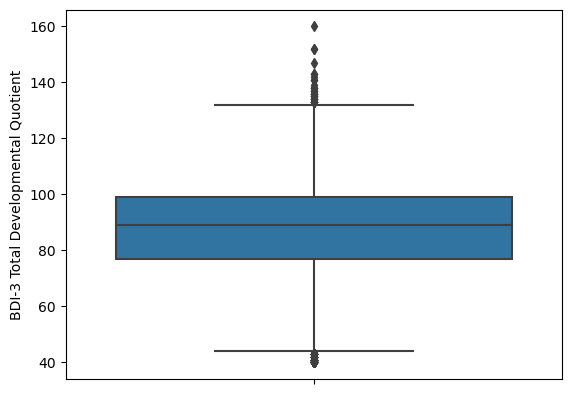

In [57]:
sns.boxplot(y = bdi_dq['BDI-3 Total Developmental Quotient'])

In [58]:
##coming back to do histogram to look at bdi-3 dq 

###### Looking at DQ scores

In [59]:
dq_score_domains=df.iloc[:,[0,1,3,4,8,16,24,32,40]]
dq_score_domains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19498 entries, 0 to 19497
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Child ID                                 19498 non-null  object        
 1   Gender                                   19498 non-null  object        
 2   Date of Birth                            19498 non-null  datetime64[ns]
 3   Date Tested                              19498 non-null  datetime64[ns]
 4   Adaptive Developmental Quotient          19493 non-null  float64       
 5   Social-Emotional Developmental Quotient  19483 non-null  float64       
 6   Communication Developmental Quotient     19469 non-null  float64       
 7   Motor Developmental Quotient             19471 non-null  float64       
 8   Cognitive Developmental Quotient         19481 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object

In [60]:
dq_score_domains['Age_num']=round(((dq_score_domains['Date Tested'] - dq_score_domains['Date of Birth']).dt.days) / 365,3)

dq_score_domains['months'] = (dq_score_domains['Age_num'] * 12).apply(int)

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_91336/1776731912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dq_score_domains['Age_num']=round(((dq_score_domains['Date Tested'] - dq_score_domains['Date of Birth']).dt.days) / 365,3)
/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_91336/1776731912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dq_score_domains['months'] = (dq_score_domains['Age_num'] * 12).apply(int)


In [61]:
dq_score_domains=dq_score_domains.drop(columns=['Date of Birth','Date Tested','Age_num'])

In [68]:
dq_score_domains['months']=dq_score_domains['months'].astype(str)

In [69]:
dq_score_domains.describe()

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
count,19493.000000,19483.000000,19469.000000,19471.000000,19481.000000
mean,87.435079,94.470051,79.604499,94.511222,89.061804
std,17.438731,16.695712,20.168400,17.288802,16.498114
min,46.000000,46.000000,46.000000,42.000000,40.000000
25%,76.000000,84.000000,64.000000,85.000000,80.000000
50%,88.000000,96.000000,79.000000,96.000000,90.000000
75%,100.000000,106.000000,94.000000,106.000000,100.000000
max,148.000000,154.000000,154.000000,154.000000,160.000000


In [78]:
dq_score_domains

,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,months
0,44879,F,85.0,127.0,91.0,88.0,100.0,8
1,47795,F,88.0,104.0,97.0,102.0,100.0,26
2,54340,M,90.0,91.0,82.0,109.0,83.0,21
3,54344,F,115.0,103.0,88.0,91.0,113.0,11
4,54515,M,75.0,73.0,70.0,73.0,97.0,15
...,...,...,...,...,...,...,...,...
19493,SP03287,F,115.0,115.0,112.0,118.0,113.0,1
19494,SP03288,F,115.0,116.0,112.0,117.0,122.0,29
19495,SP03289,F,103.0,102.0,55.0,104.0,98.0,24
19496,SP03290,M,88.0,90.0,76.0,100.0,88.0,43


<Figure size 2000x1000 with 0 Axes>

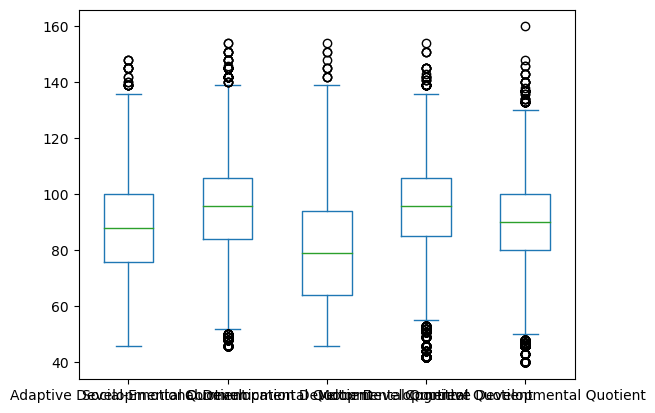

<Figure size 2000x1000 with 0 Axes>

In [70]:
dq_score_domains.plot.box()
plt.figure(figsize=(20, 10))


In [71]:
# from elisia
dq_list = [col for col in dq_score_domains.columns if 'Quotient' in col]
dq_list

['Adaptive Developmental Quotient',
 'Social-Emotional Developmental Quotient',
 'Communication Developmental Quotient',
 'Motor Developmental Quotient',
 'Cognitive Developmental Quotient']

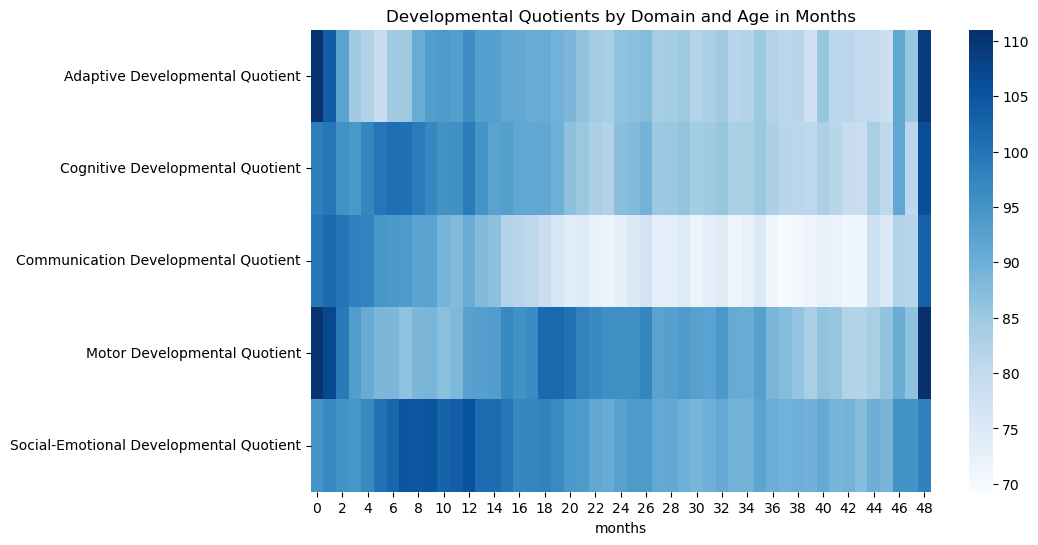

In [88]:
# from elisia
pivot_df = df.pivot_table(index="months", values=dq_list, aggfunc='mean')

plt.figure(figsize=(10, 6))

sns.heatmap(pivot_df.T, annot=False, cmap='Blues')
plt.title('Developmental Quotients by Domain and Age in Months')
dq_dict= {
    'Adaptive Developmental Quotient' : '#022B3A',
    'Social-Emotional Developmental Quotient' : '#115363',
    'Communication Developmental Quotient  ' : '#1F7A8C',
    'Motor Developmental Quotient  ' : '#BFDBF7',
    'Cognitive Developmental Quotient  ' : '#E1E5F2',
}

plt.show()

##took out bdi-3 over all and will take out four yr old outlier 

In [73]:
# data_1 = np.random.normal(100, 10, 200)
# data_2 = np.random.normal(90, 20, 200)
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
# data = [data_1, data_2, data_3, data_4]
 
# fig = plt.figure(figsize =(10, 7))
 
# # Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])
 
# # Creating plot
# bp = ax.boxplot(data)
 
# # show plot
# plt.show()

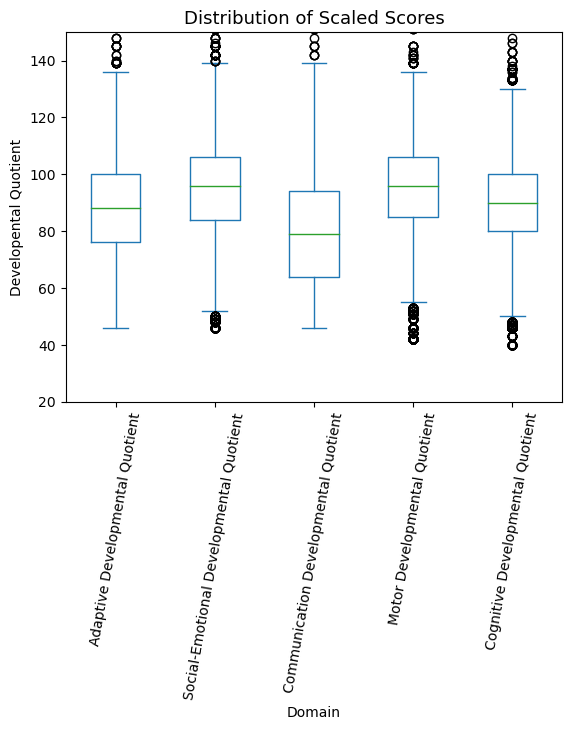

In [87]:
p = dq_score_domains[['Adaptive Developmental Quotient',
 'Social-Emotional Developmental Quotient',
 'Communication Developmental Quotient',
 'Motor Developmental Quotient',
 'Cognitive Developmental Quotient']].plot(kind='box', rot=80)

dq_dict= {
    'Adaptive Developmental Quotient' : '#022B3A',
    'Social-Emotional Developmental Quotient' : '#115363',
    'Communication Developmental Quotient  ' : '#1F7A8C',
    'Motor Developmental Quotient  ' : '#BFDBF7',
    'Cognitive Developmental Quotient  ' : '#E1E5F2',
}
# Display the plot
p.set_title("Distribution of Scaled Scores", fontsize=13);
p.set_xlabel("Domain", fontsize=10);
p.set_ylabel("Developental Quotient", fontsize=10);
p.set_ylim(20,150);
plt.show()

Colors for graphs:

In [85]:
# dq_dict= {
#     'Adaptive Developmental Quotient' : '#022B3A',
#     'Social-Emotional Developmental Quotient' : '#115363',
#     'Communication Developmental Quotient  ' : '#1F7A8C',
#     'Motor Developmental Quotient  ' : '#BFDBF7',
#     'Cognitive Developmental Quotient  ' : '#E1E5F2',
# }